In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

## Dataset

In [347]:
iris = datasets.load_iris()
x = iris.data[:,[0,3]]
y = iris.target

In [348]:
y[y == 2] = 1

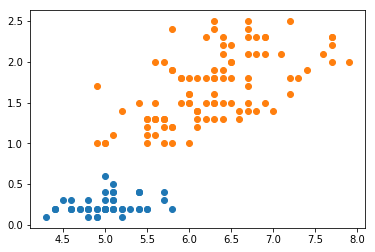

In [349]:
plt.scatter(x[:,0][y == 0.], x[:,1][y == 0.])
plt.scatter(x[:,0][y == 1.], x[:,1][y == 1.])
plt.show()

## Sklearn LogisticRegression

In [350]:
log = LogisticRegression(solver='lbfgs')
log.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [351]:
w0 = log.intercept_[0]
wS = log.coef_[0]

print(f'intercept = {w0}')
print(f'slopes    = {wS}')

intercept = -10.481505450266111
slopes    = [1.3983599  3.91315269]


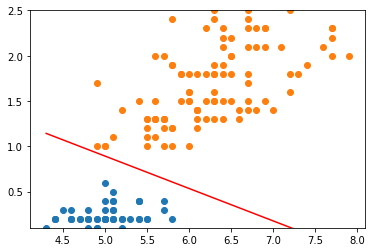

In [352]:
x1 = np.linspace(np.min(x[:,0]), np.max(x[:,0]), num = 10)
y1 = -( wS[0] * x1 + w0)/wS[1]
plt.scatter(x[:,0][y == 0.], x[:,1][y == 0.])
plt.scatter(x[:,0][y == 1.], x[:,1][y == 1.])
plt.plot(x1, y1, '-r')
plt.ylim((np.min(x[:,1]), np.max(x[:,1])))
plt.show()

## Gradient ascent

In [353]:
p = x.shape[1] + 1
n = x.shape[0]
eps = 0.005
eta = 0.005

In [354]:
W = np.zeros((p,))
W

array([0., 0., 0.])

In [355]:
H = np.append(np.ones((n,1)), x, axis=1)
H.shape

(150, 3)

In [356]:
A = 1 / (1 + np.e ** -np.dot(W, H.T))

In [357]:
G = np.dot(y - A, H)

In [358]:
t = 1
while np.dot(G, G) > eps:
    W = W + eta * G
    A = 1 / (1 + np.e ** -np.dot(W, H.T))
    G = np.dot(y - A, H)
    t = t + 1

In [359]:
W

array([-3.97195003, -1.60602513, 16.74888397])

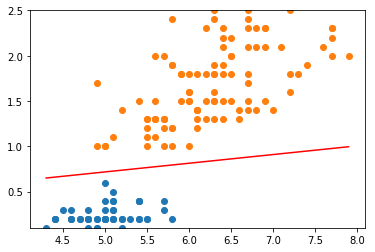

In [360]:
x1 = np.linspace(np.min(x[:,0]), np.max(x[:,0]), num = 10)
y1 = -( W[0] + W[1] * x1) / W[2]
plt.scatter(x[:,0][y == 0.], x[:,1][y == 0.])
plt.scatter(x[:,0][y == 1.], x[:,1][y == 1.])
plt.plot(x1, y1, '-r')
plt.ylim((np.min(x[:,1]), np.max(x[:,1])))
plt.show()

## Gradient ascent, p + 1

In [361]:
H = np.append(np.ones((n,1)), x, axis=1)
H = np.append(H, x[:,0][:,np.newaxis] ** 2, axis=1)
H.shape

(150, 4)

In [362]:
def gradient_ascent(H, eps = 0.005, eta = 0.005):
    n, p = H.shape
    
    W = np.zeros((p,))
    A = 1 / (1 + np.e ** -np.dot(W, H.T))
    G = np.dot(y - A, H)
    t = 1
    while np.dot(G, G) > eps:
        W = W + eta * G
        A = 1 / (1 + np.e ** -np.dot(W, H.T))
        G = np.dot(y - A, H)
        t = t + 1
        
    return W

In [363]:
W = gradient_ascent(H)
W

array([-13.30049107, -37.2783323 ,  48.26970092,   6.26599076])

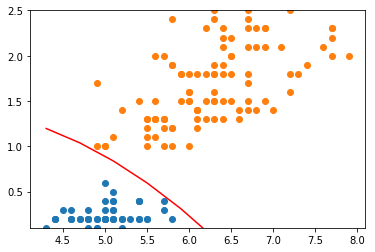

In [364]:
x1 = np.linspace(np.min(x[:,0]), np.max(x[:,0]), num = 10)
y1 = -( W[0] + W[1] * x1 + W[3] * (x1 ** 2)) / W[2]
plt.scatter(x[:,0][y == 0.], x[:,1][y == 0.])
plt.scatter(x[:,0][y == 1.], x[:,1][y == 1.])
plt.plot(x1, y1, '-r')
plt.ylim((np.min(x[:,1]), np.max(x[:,1])))
plt.show()

## Gradient ascent, p + 2

In [365]:
H = np.append(np.ones((n,1)), x, axis=1)
H = np.append(H, x[:,0][:,np.newaxis] ** 2, axis=1)
H = np.append(H, x[:,0][:,np.newaxis] ** 3, axis=1)
H.shape

(150, 5)

In [366]:
W = gradient_ascent(H)
W

/home/valdo/.local/share/virtualenvs/hypersp-OUlGHzYz/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in power
  # Remove the CWD from sys.path while we load stuff.


array([  -2.02152862,  -35.16243386,  952.5225803 , -185.53332275,
         31.33799852])

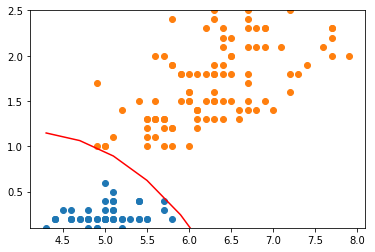

In [367]:
x1 = np.linspace(np.min(x[:,0]), np.max(x[:,0]), num = 10)
y1 = -( W[0] + W[1] * x1 + W[3] * (x1 ** 2) + W[4] * (x1 ** 3)) / W[2]
plt.scatter(x[:,0][y == 0.], x[:,1][y == 0.])
plt.scatter(x[:,0][y == 1.], x[:,1][y == 1.])
plt.plot(x1, y1, '-r')
plt.ylim((np.min(x[:,1]), np.max(x[:,1])))
plt.show()